# DATA ANALYSIS OF GOOGLE PLAYSTORE'S RATING

###  Import Required Modules

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read Data

In [39]:
google_data = pd.read_csv("googleplaystore.csv")

In [42]:
google_data[10480:10485]  ## returns first 5 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10480,FJ 4x4 Cruiser Offroad Driving,FAMILY,4.1,3543,49M,"500,000+",Free,0,Everyone,Simulation,04-Jan-17,1.1,2.3 and up
10481,FJ 4x4 Cruiser Snow Driving,FAMILY,4.2,1619,43M,"500,000+",Free,0,Everyone,Simulation,04-Jun-18,1.3,4.0 and up
10482,Wallpapers Toyota FJ Cruiser,PERSONALIZATION,4.2,78,10M,"10,000+",Free,0,Everyone,Personalization,20-Jun-16,1,2.3.3 and up
10483,New Wallpapers Toyota FJ Cruiser Theme,PERSONALIZATION,NaN,1,16M,100+,Free,0,Teen,Personalization,23-Feb-18,1,4.1 and up
10484,"FJ Final Join , Circles Game",GAME,4.7,32,24M,"1,000+",Free,0,Teen,Arcade,11-Jul-18,0.24,4.3 and up


In [43]:
google_data.shape 

(10841, 13)

In [44]:
google_data.describe() #Summary Statistics

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<AxesSubplot:>

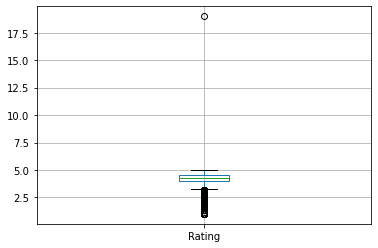

In [45]:
google_data.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

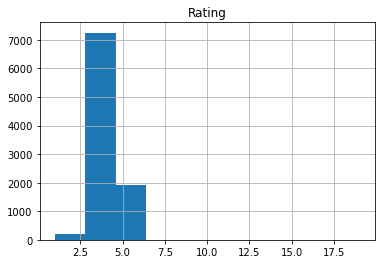

In [12]:
google_data.hist()

## Data Cleaning


#### Coun the Number of Missing Values

In [49]:
google_data.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


### Count the missing value in each column

In [50]:
google_data.isnull().sum() 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                1
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Finding Outliers: Check Rating > 5

In [18]:
google_data[google_data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [51]:
google_data.drop([10472],inplace=True)

In [52]:
google_data[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,10-Feb-17,0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,05-Aug-14,3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,07-Aug-18,6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,21-Nov-14,2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,17-May-17,0.0.9,2.3 and up


<AxesSubplot:>

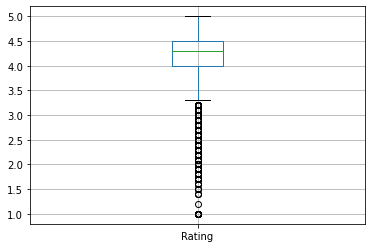

In [53]:
google_data.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

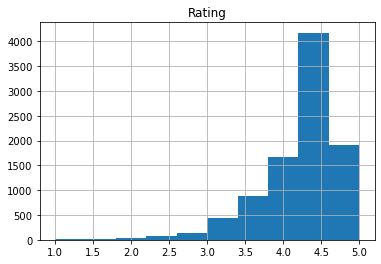

In [54]:
google_data.hist()

### Remove columns that are 90% empty

In [55]:
threshold = len(google_data)*0.1 #10% of the rows
threshold

1084.0

In [56]:
google_data.dropna(thresh=threshold,axis=1,inplace=True);

### Data Imputation and Manipulation

##### Fill the null values with the appropriate values using aggregate functions such as mean, median, mode.

In [57]:
def impute_median(series):
    return series.fillna(series.median())

In [58]:
google_data.Rating = google_data['Rating'].transform(impute_median)

In [59]:
#count the number of null values in the dataframe to check if rating is filled or not 
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [60]:
#modes of categorial values 
print(google_data['Type'].mode())
print(google_data['Current Ver'].mode())
print(google_data['Android Ver'].mode())

0    Free
Name: Type, dtype: object
0    Varies with device
Name: Current Ver, dtype: object
0    4.1 and up
Name: Android Ver, dtype: object


In [61]:
#fill the missing categorical values
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]),inplace=True)
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]),inplace=True)
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]),inplace=True)

In [34]:
# count the null values in the column
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [64]:
#Convert Price, reviews, Rating and Installs into Numerical values

google_data['Price'] = google_data['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x) )
google_data['Price'] = google_data['Price'].apply(lambda x: float(x))
google_data['Reviews'] = pd.to_numeric(google_data['Reviews'],errors='coerce')

In [68]:
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x) )
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x) )
google_data['Installs'] = google_data['Installs'].apply(lambda x: float(x))

In [69]:
google_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000.0,Free,0.0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100.0,Free,0.0,Everyone,Education,06-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000.0,Free,0.0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000.0,Free,0.0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


In [71]:
google_data.describe() #statistics summary after data cleaning

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


### Data Visualization

In [79]:
grp = google_data.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

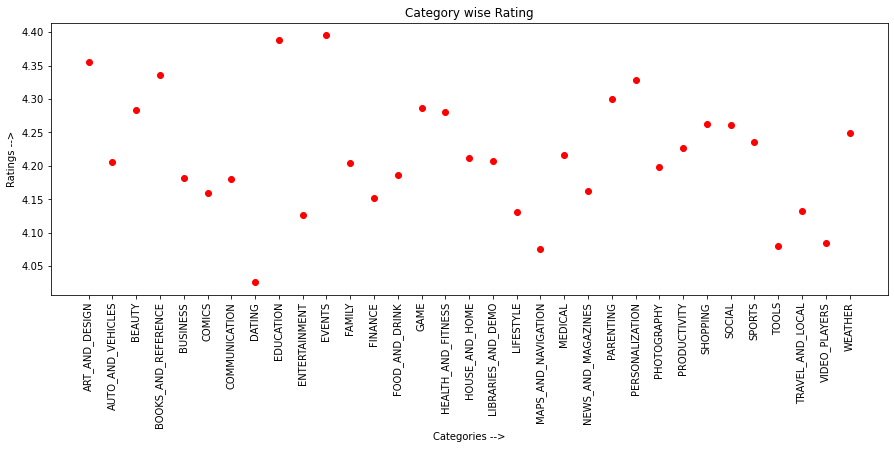

In [95]:
plt.figure(figsize=(15,5))
plt.plot(x,'ro')
plt.xticks(rotation=90)
plt.title("Category wise Rating")
plt.xlabel("Categories -->")
plt.ylabel("Ratings -->")
plt.show()

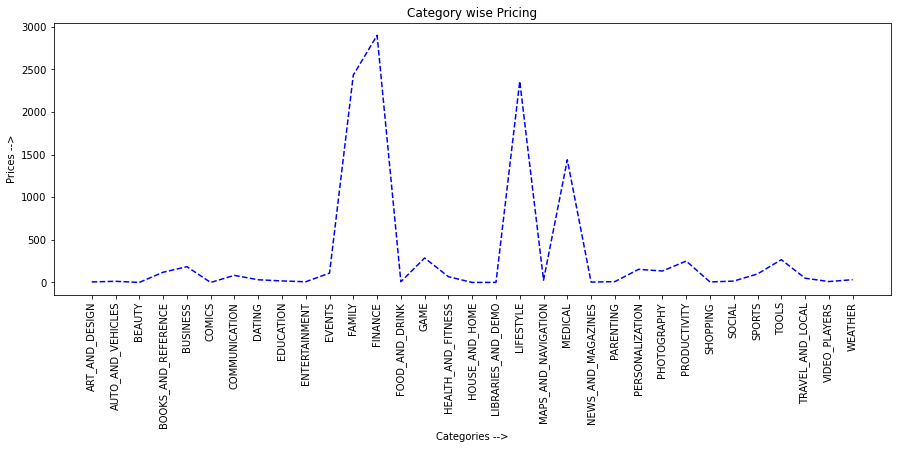

In [100]:
plt.figure(figsize=(15,5))
plt.plot(y,'b--')
plt.xticks(rotation=90)
plt.title("Category wise Pricing")
plt.xlabel("Categories -->")
plt.ylabel("Prices -->")
plt.show()

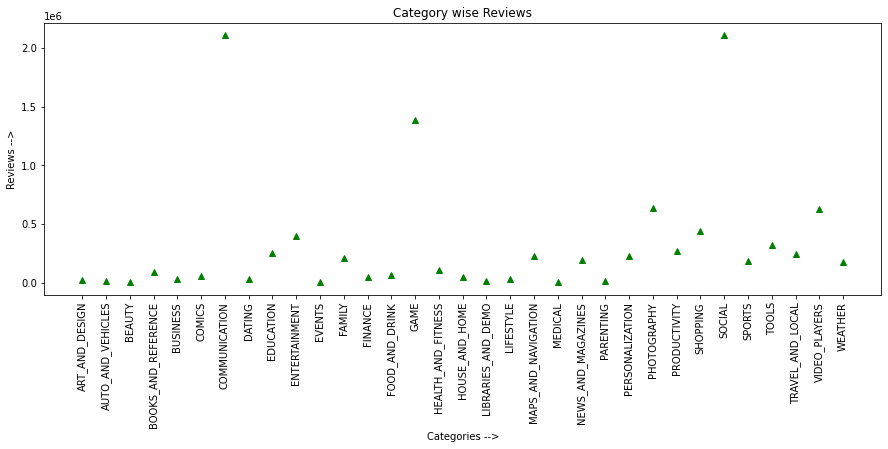

In [103]:
plt.figure(figsize=(15,5))
plt.plot(z,'g^')
plt.xticks(rotation=90)
plt.title("Category wise Reviews")
plt.xlabel("Categories -->")
plt.ylabel("Reviews -->")
plt.show()